In [1]:
pip install tensorflow

In [2]:
from keras.models import Sequential

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

#df = pd.read_csv('META LSTM.csv')
#df = pd.read_csv('PFE LSTM.csv')
df = pd.read_excel('TSLA LSTM.xlsx')
#df = pd.read_excel('WMT LSTM.xlsx')

#df = pd.read_csv('Stock Prices updated.csv')

df = df[['Symbol','Date','Open','High','Low','Close','Adj Close','Volume']]

#df[df['Low'] < 0]

In [5]:
df['returns'] = df.Close.pct_change()

In [6]:
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,TSLA,2022-02-28,271.670013,271.670013,292.286682,271.570007,290.143341,99006900,NaN
1,TSLA,2022-03-01,289.893341,289.893341,296.626679,284.593323,288.123321,74766900,0.047956
2,TSLA,2022-03-02,290.709991,290.709992,295.493347,281.423340,293.296661,74643300,-0.011139
3,TSLA,2022-03-03,292.923340,292.923340,295.480011,277.533325,279.763336,61623600,-0.013823
4,TSLA,2022-03-04,283.033325,283.033325,285.216675,275.053345,279.429993,66999600,-0.008936
...,...,...,...,...,...,...,...,...,...
245,TSLA,2023-02-17,199.990005,199.990005,208.440002,197.500000,208.309998,213080200,-0.021502
246,TSLA,2023-02-21,204.990005,204.990005,209.710007,197.220001,197.369995,180018600,-0.001418
247,TSLA,2023-02-22,197.929993,197.929993,201.990005,191.779999,200.860001,191828500,-0.027583
248,TSLA,2023-02-23,203.910004,203.910004,205.139999,196.330002,202.070007,146360000,0.023725


In [7]:
df['log_returns'] = np.log(1+ df['returns'])
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns,log_returns
0,TSLA,2022-02-28,271.670013,271.670013,292.286682,271.570007,290.143341,99006900,NaN,NaN
1,TSLA,2022-03-01,289.893341,289.893341,296.626679,284.593323,288.123321,74766900,0.047956,0.046841
2,TSLA,2022-03-02,290.709991,290.709992,295.493347,281.423340,293.296661,74643300,-0.011139,-0.011201
3,TSLA,2022-03-03,292.923340,292.923340,295.480011,277.533325,279.763336,61623600,-0.013823,-0.013919
4,TSLA,2022-03-04,283.033325,283.033325,285.216675,275.053345,279.429993,66999600,-0.008936,-0.008976
...,...,...,...,...,...,...,...,...,...,...
245,TSLA,2023-02-17,199.990005,199.990005,208.440002,197.500000,208.309998,213080200,-0.021502,-0.021737
246,TSLA,2023-02-21,204.990005,204.990005,209.710007,197.220001,197.369995,180018600,-0.001418,-0.001419
247,TSLA,2023-02-22,197.929993,197.929993,201.990005,191.779999,200.860001,191828500,-0.027583,-0.027971
248,TSLA,2023-02-23,203.910004,203.910004,205.139999,196.330002,202.070007,146360000,0.023725,0.023448


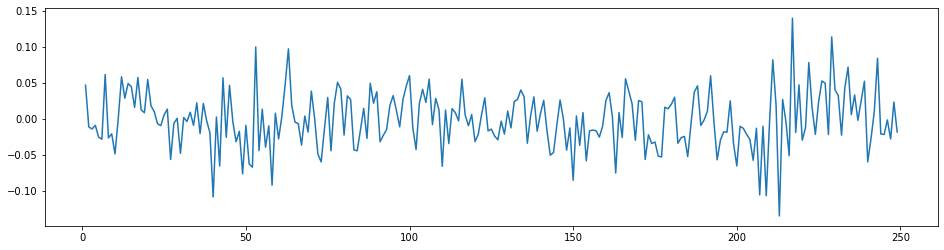

In [8]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (16,4))
plt.plot(df.log_returns)


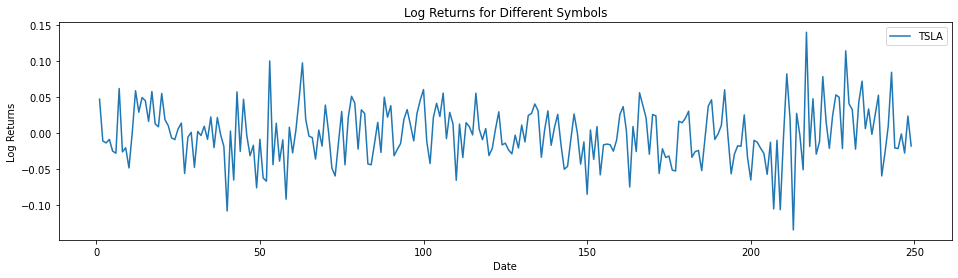

In [9]:
grouped_data = df.groupby("Symbol")

# Loop through each group and plot the data
plt.figure(1, figsize=(16, 4))
for symbol, group in grouped_data:
    plt.plot(group["log_returns"], label=symbol)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns for Different Symbols")
plt.legend()

# Show the plot
plt.show()

### Preprocessing Steps

In [10]:
df.dropna(inplace = True)
X = df[['Close','log_returns']].values
X

array([[ 2.84593323e+02,  4.68412638e-02],
       [ 2.81423340e+02, -1.12011407e-02],
       [ 2.77533325e+02, -1.39190662e-02],
       [ 2.75053345e+02, -8.97595720e-03],
       [ 2.68190002e+02, -2.52693661e-02],
       [ 2.60723328e+02, -2.82358959e-02],
       [ 2.77336670e+02,  6.17723854e-02],
       [ 2.70119995e+02, -2.63658964e-02],
       [ 2.64589996e+02, -2.06848425e-02],
       [ 2.52013336e+02, -4.86994365e-02],
       [ 2.52190002e+02,  7.00773651e-04],
       [ 2.67420013e+02,  5.86377251e-02],
       [ 2.75239990e+02,  2.88229024e-02],
       [ 2.89130005e+02,  4.92330222e-02],
       [ 3.02363342e+02,  4.47529835e-02],
       [ 3.07250000e+02,  1.60323340e-02],
       [ 3.25466675e+02,  5.75983264e-02],
       [ 3.29600006e+02,  1.26197417e-02],
       [ 3.32440002e+02,  8.57958336e-03],
       [ 3.51200012e+02,  5.48964966e-02],
       [ 3.57703339e+02,  1.83480832e-02],
       [ 3.61333344e+02,  1.00969417e-02],
       [ 3.58880005e+02, -6.81283704e-03],
       [ 3.

In [11]:
df

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,returns,log_returns
1,TSLA,2022-03-01,289.893341,289.893341,296.626679,284.593323,288.123321,74766900,0.047956,0.046841
2,TSLA,2022-03-02,290.709991,290.709992,295.493347,281.423340,293.296661,74643300,-0.011139,-0.011201
3,TSLA,2022-03-03,292.923340,292.923340,295.480011,277.533325,279.763336,61623600,-0.013823,-0.013919
4,TSLA,2022-03-04,283.033325,283.033325,285.216675,275.053345,279.429993,66999600,-0.008936,-0.008976
5,TSLA,2022-03-07,285.433319,285.433319,288.713318,268.190002,268.193329,72494100,-0.024953,-0.025269
...,...,...,...,...,...,...,...,...,...,...
245,TSLA,2023-02-17,199.990005,199.990005,208.440002,197.500000,208.309998,213080200,-0.021502,-0.021737
246,TSLA,2023-02-21,204.990005,204.990005,209.710007,197.220001,197.369995,180018600,-0.001418,-0.001419
247,TSLA,2023-02-22,197.929993,197.929993,201.990005,191.779999,200.860001,191828500,-0.027583,-0.027971
248,TSLA,2023-02-23,203.910004,203.910004,205.139999,196.330002,202.070007,146360000,0.023725,0.023448


In [12]:
X

array([[ 2.84593323e+02,  4.68412638e-02],
       [ 2.81423340e+02, -1.12011407e-02],
       [ 2.77533325e+02, -1.39190662e-02],
       [ 2.75053345e+02, -8.97595720e-03],
       [ 2.68190002e+02, -2.52693661e-02],
       [ 2.60723328e+02, -2.82358959e-02],
       [ 2.77336670e+02,  6.17723854e-02],
       [ 2.70119995e+02, -2.63658964e-02],
       [ 2.64589996e+02, -2.06848425e-02],
       [ 2.52013336e+02, -4.86994365e-02],
       [ 2.52190002e+02,  7.00773651e-04],
       [ 2.67420013e+02,  5.86377251e-02],
       [ 2.75239990e+02,  2.88229024e-02],
       [ 2.89130005e+02,  4.92330222e-02],
       [ 3.02363342e+02,  4.47529835e-02],
       [ 3.07250000e+02,  1.60323340e-02],
       [ 3.25466675e+02,  5.75983264e-02],
       [ 3.29600006e+02,  1.26197417e-02],
       [ 3.32440002e+02,  8.57958336e-03],
       [ 3.51200012e+02,  5.48964966e-02],
       [ 3.57703339e+02,  1.83480832e-02],
       [ 3.61333344e+02,  1.00969417e-02],
       [ 3.58880005e+02, -6.81283704e-03],
       [ 3.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)).fit(X)
X_scaled = scaler.transform(X)

In [14]:
X_scaled[:5]

array([[0.70133142, 0.66108061],
       [0.68916834, 0.44992958],
       [0.67424253, 0.4400421 ],
       [0.66472696, 0.45802452],
       [0.63839262, 0.39875112]])

In [15]:
y = [x[0] for x in X_scaled]

y[:5]

[0.701331424018399,
 0.6891683413680998,
 0.674242529749971,
 0.6647269557571043,
 0.6383926190580764]

In [16]:
split = int(len(X_scaled) * 0.7 )

print(split)

174


In [17]:
x_train = X_scaled[:split]
x_test = X_scaled[split : len(X_scaled)]

y_train = y[:split]
y_test = y[split : len(y)]

In [18]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [19]:
n =3 

xtrain = []
ytrain = []

xtest = []
ytest = []

for i in range(n, len(x_train)):
    xtrain.append(x_train[i - n : i, : x_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
    
for i in range(n, len(x_test)):
    xtest.append(x_test[i - n : i, : x_test.shape[1]])
    ytest.append(y_test[i])  # predict next record
    

In [20]:
ytest

[0.30012663774603915,
 0.30994923338048236,
 0.3243378152557234,
 0.346285203797466,
 0.32172871413581466,
 0.30346476994001476,
 0.28677405026472275,
 0.2522030466103165,
 0.24702319205152173,
 0.2712343699449015,
 0.3024288342515042,
 0.29617457852865253,
 0.29521533973696984,
 0.3024288342515042,
 0.34528761655736934,
 0.3426401078999372,
 0.3021218709316465,
 0.2820929599732693,
 0.2701600271025631,
 0.25803523496265474,
 0.27453415369046325,
 0.25212634971348874,
 0.21141625309230055,
 0.20527710142010452,
 0.19748808703598691,
 0.18505633119252524,
 0.1688644341062931,
 0.1375548661327302,
 0.13076343898870918,
 0.07846575042594561,
 0.07370790491594592,
 0.02666685567507815,
 0.024671622873166432,
 0.06020183577470062,
 0.06883498489984519,
 0.010858590028367754,
 0.021909010165078402,
 0.020527733547436977,
 0.0,
 0.058705425561848656,
 0.0503024845380155,
 0.07175107888416654,
 0.05828335819133512,
 0.05291161520247911,
 0.08905572558286962,
 0.09669128746791755,
 0.0863314912

In [21]:
xtrain[0]
#y_train[0]

array([[0.70133142, 0.66108061],
       [0.68916834, 0.44992958],
       [0.67424253, 0.4400421 ]])

In [22]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [23]:
scaler.inverse_transform(val)

array([[ 2.75053345e+02, -1.34880354e-01]])

In [24]:
xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
xtrain  = np.reshape( xtrain, (xtrain.shape[0], xtrain.shape[1],xtrain.shape[2]))
                  
xtest, ytest = (np.array(xtest), np.array(ytest))
xtest  = np.reshape( xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2]))


In [25]:
print(xtrain.shape)
print(ytrain.shape)

print("----")

print(xtest.shape)
print(ytest.shape)

(171, 3, 2)
(171,)
----
(72, 3, 2)
(72,)


In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [27]:
model = Sequential()

model.add(LSTM(4, input_shape = (xtrain.shape[1], xtrain.shape[2])))

model.add(Dense(1))

model.compile(loss = "mean_squared_error",optimizer = "adam")

model.fit(
xtrain, ytrain, epochs = 25, validation_data = (xtest, ytest), batch_size = 16, verbose = 1
)

Epoch 1/25
11/11 [==============================] - 3s 54ms/step - loss: 0.3741 - val_loss: 0.0963
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.3084 - val_loss: 0.0708
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 0.2509 - val_loss: 0.0502
Epoch 4/25
11/11 [==============================] - 0s 6ms/step - loss: 0.2017 - val_loss: 0.0338
Epoch 5/25
11/11 [==============================] - 0s 6ms/step - loss: 0.1584 - val_loss: 0.0216
Epoch 6/25
11/11 [==============================] - 0s 7ms/step - loss: 0.1223 - val_loss: 0.0130
Epoch 7/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0911 - val_loss: 0.0077
Epoch 8/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0666 - val_loss: 0.0051
Epoch 9/25
11/11 [==============================] - 0s 6ms/step - loss: 0.0467 - val_loss: 0.0049
Epoch 10/25
11/11 [==============================] - 0s 7ms/step - loss: 0.0322 - val_loss: 0.0065
Epoch 11/25
11/11 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [29]:
trainpredict = model.predict(xtrain)

testpredict = model.predict(xtest)


3/3 [==============================] - 0s 3ms/step


In [30]:
trainpredict = np.c_[trainpredict,np.zeros(trainpredict.shape)]

testpredict = np.c_[testpredict,np.zeros(testpredict.shape)]

In [31]:
## Invert Predictions

trainpredict = scaler.inverse_transform(trainpredict)
trainpredict = [x[0] for x in trainpredict]

testpredict = scaler.inverse_transform(testpredict)
testpredict = [x[0] for x in testpredict]



In [32]:
print(trainpredict[:5])
print(testpredict[:5])


[276.33639405541504, 276.4215378853056, 273.6828456638352, 270.9251704538361, 271.95913748859556]
[220.71546094804103, 214.08446382578367, 209.2981409439654, 208.63022557998522, 210.86277726770356]


In [33]:
## calculate mean squared error 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

trainscore_mse = mean_squared_error([x[0][0]  for x in xtrain], trainpredict, squared = False )
trainscore_rmse = sqrt(trainscore_mse)
trainscore_mae = mean_absolute_error([x[0][0]  for x in xtrain], trainpredict)
r2_train = r2_score([x[0][0]  for x in xtrain], trainpredict)

print("Train Score: %.2f MSE" % (trainscore_mse))
print("Train Score: %.2f RMSE" % (trainscore_rmse))
print("Train Score: %.2f MAE" % (trainscore_mae))
print("Train Score: %.2f R2 Score" % (r2_train))

testscore_mse = mean_squared_error([x[0][0]  for x in xtest], testpredict, squared = False )
testscore_rmse = sqrt(testscore_mse)
testscore_mae = mean_absolute_error([x[0][0]  for x in xtest], testpredict)
r2_test = r2_score([x[0][0]  for x in xtest], testpredict)

print("Test Score: %.2f RMSE" % (testscore_mse))
print("Test Score: %.2f RMSE" % (testscore_rmse))
print("Test Score: %.2f MAE" % (testscore_mae))
print("Test Score: %.2f R2 Score" % (r2_test))


Train Score: 267.17 MSE
Train Score: 16.35 RMSE
Train Score: 266.14 MAE
Train Score: -2905623.66 R2 Score
Test Score: 193.76 RMSE
Test Score: 13.92 RMSE
Test Score: 192.23 MAE
Test Score: -2725750.84 R2 Score


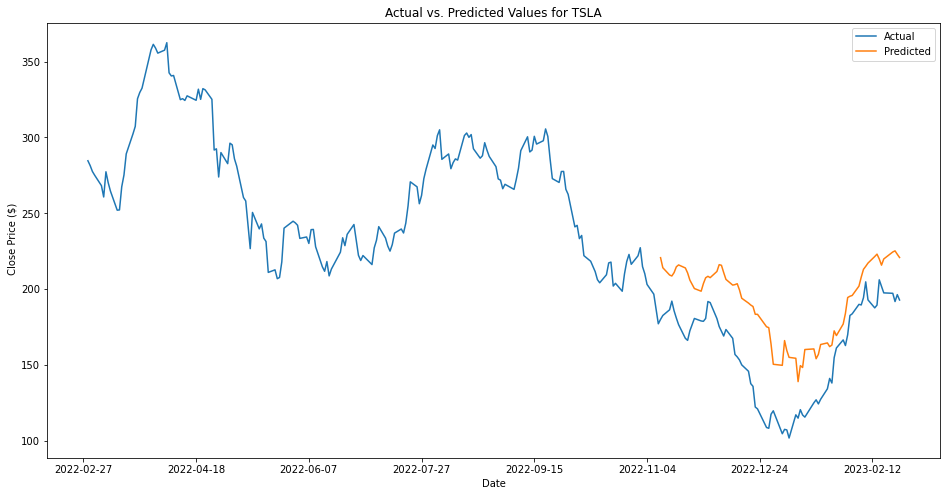

In [34]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


# Set figure size and create axes object
fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual and predicted values
ax.plot(df['Date'], df['Close'], label='Actual')
ax.plot(df.iloc[split+n:]['Date'], testpredict, label='Predicted')

# Add labels and legend
ax.set_title('Actual vs. Predicted Values for TSLA')
ax.set_xlabel('Date')
ax.set_ylabel(' Close Price ($)')
ax.legend()

# Format x-axis date labels
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Show the plot
plt.show()

In [35]:
import pandas as pd

# Load original data into a DataFrame
df = pd.read_excel('WMT LSTM.xlsx', index_col='Date', parse_dates=True)

# Extract the dates from the test data
dates = df.index[-len(testpredict):]

# Create a new DataFrame with the predicted values
predictions = pd.DataFrame({'Predictions': testpredict}, index=dates)

# Concatenate the original "Close" column with the predicted values
result = pd.concat([df['Close'], predictions], axis=1)


In [36]:
result = result.tail(30)

result.to_csv('TSLA close and predicted prices Updated.csv')